In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/MS/4th Sem/DATA 606 Capstone/Dataset/Merged Data'

In [ ]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Consumer_Durables.csv")

In [ ]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10612 entries, 0 to 10611
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10612 non-null  object 
 1   Symbol              10612 non-null  object 
 2   Series              10612 non-null  object 
 3   Prev Close          10612 non-null  float64
 4   Open                10612 non-null  float64
 5   High                10612 non-null  float64
 6   Low                 10612 non-null  float64
 7   Last                10612 non-null  float64
 8   Close               10612 non-null  float64
 9   VWAP                10612 non-null  float64
 10  Volume              10612 non-null  int64  
 11  Turnover            10612 non-null  float64
 12  Trades              4912 non-null   float64
 13  Deliverable Volume  9589 non-null   float64
 14  %Deliverble         9589 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.2

In [ ]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  10612.000000  10612.000000  10612.000000  10612.000000  10612.000000   
mean     978.115822    978.836939    993.969082    963.665732    978.383123   
std      978.588987    978.479287    991.710072    966.470156    978.550278   
min       27.500000     27.000000     28.800000     27.000000     27.750000   
25%      307.887500    307.825000    312.800000    303.350000    308.662500   
50%      742.250000    741.425000    759.150000    725.350000    743.100000   
75%     1215.312500   1216.012500   1238.000000   1195.000000   1215.087500   
max     5213.100000   5221.100000   5247.750000   5150.050000   5221.100000   

              Close          VWAP        Volume      Turnover         Trades  \
count  10612.000000  10612.000000  1.061200e+04  1.061200e+04    4912.000000   
mean     978.447701    979.107685  8.411343e+05  7.369486e+13   44293.935668   
std      978.666799    979.336792  1.424644e+06 

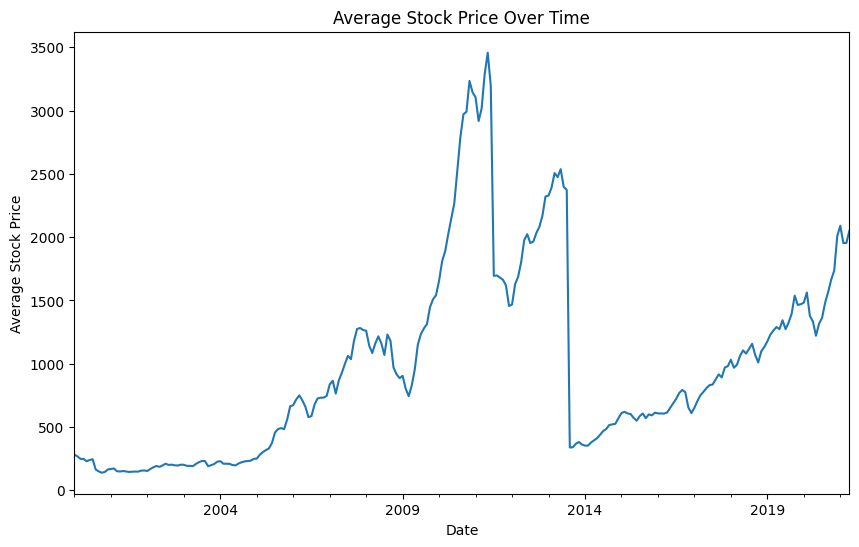

In [ ]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

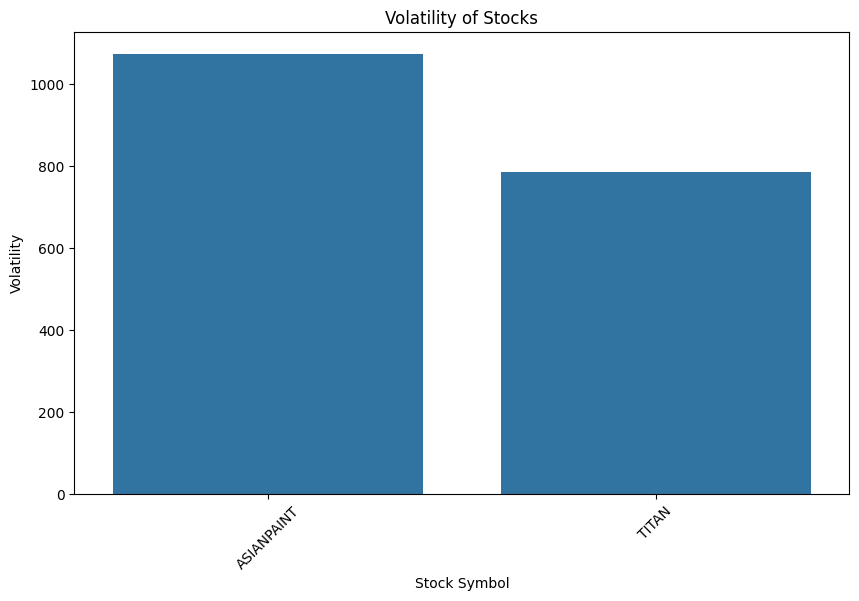

In [ ]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

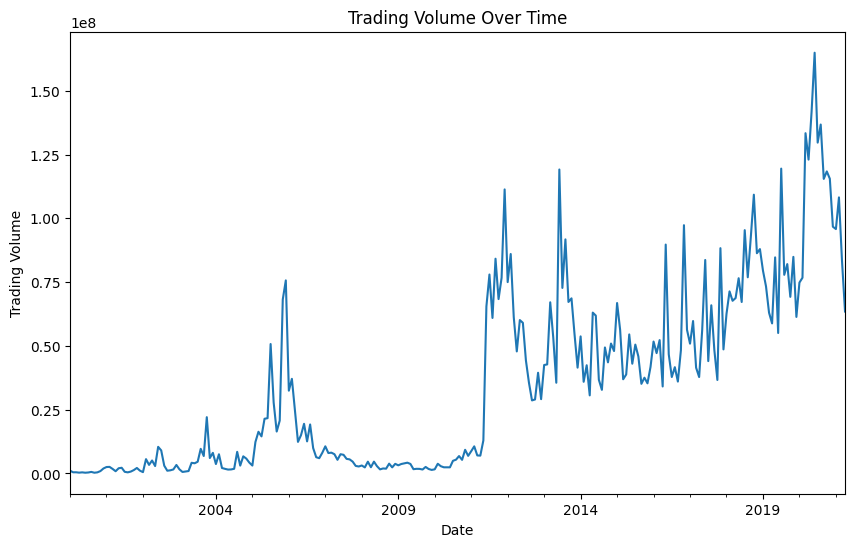

In [ ]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


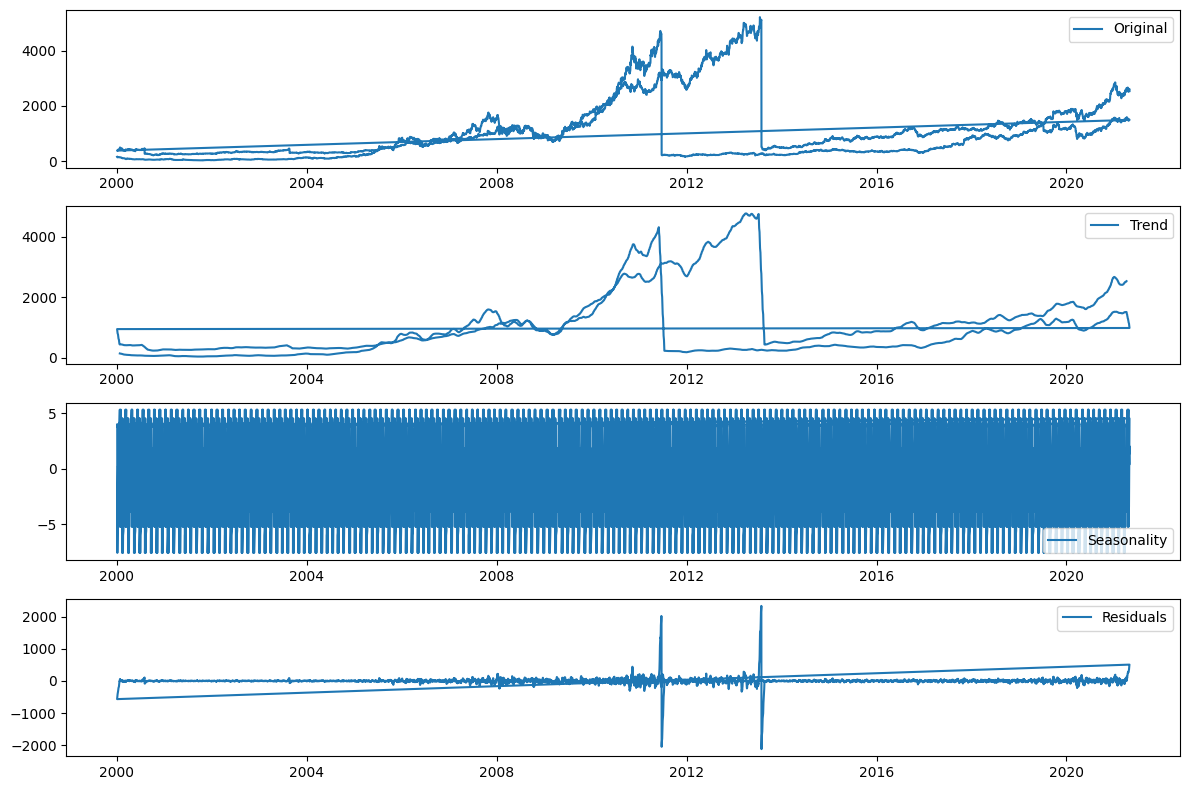

In [ ]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

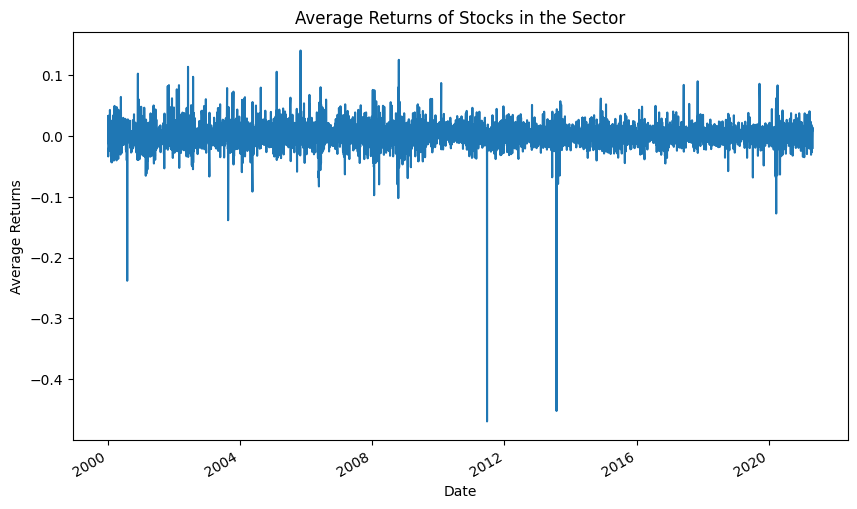

In [ ]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()